In [8]:
__author__ = 'Jonathan Pieper'
__license__ = 'tbd'
__version__ = '0.1'
__status__ = "Development"

import os, sys, time
from glob import glob
import pylab as plt
import numpy as np
from scipy import stats
import pandas as pd
from scipy.interpolate import interp1d 

folder = "D:\\Programming\\FORC-data\\0deg_30K_0.15T_Cub\\Up to"
current = 2.5e-6 # R = V/I approx M
out_name = "output.dat"

In [9]:
def get_filenames(datadir):
    """Returns all *.dat files in data directory"""
    return glob(datadir + "\\*.dat")

def sort_files(filenames):
    """Sorting files by filename key HA"""
    sort_dict = {}
    for f in filenames:
        if(f.find("HA=") == -1):  
            continue
        
        pos1 = f.find("HA=") + 3 # Cursor Position after HA=
        pos2 = f.find(".dat")    # Cursor Position before .dat
        HA = float(f[pos1:pos2]) # Number between cursor positions
        
        sort_dict[HA] = f

    new_filenames = []
    for HA in sorted(sort_dict):
        new_filenames.append(sort_dict[HA])
        
    return sort_dict

In [10]:
all_files = get_filenames(folder)
all_files_sorted = sort_files(all_files)
raw_df = {}
new_df = {}
for HA in sorted(all_files_sorted):
    data = pd.read_csv(all_files_sorted[HA], sep='\t', header=0, index_col=False, skiprows=[1,2])
    H = data['Magnetic field']
    V = data['Vx']
    R = V[H>HA]/current*1e3
    H = H[H>HA]*1e3
    
    raw_df[HA] = pd.DataFrame({'Ha': H, 'Hb': HA, 'M': R})


    f1 = interp1d(H, R, kind = 'linear')
    new_H = []
    new_R = []
    for i in np.linspace(H.min(), H.max(), 149):
        new_H.append(i)
        new_R.append(f1(i))
    
    new_df[HA] = pd.DataFrame({'Ha': new_H, 'Hb': HA, 'M': new_R})

(-150, 150)

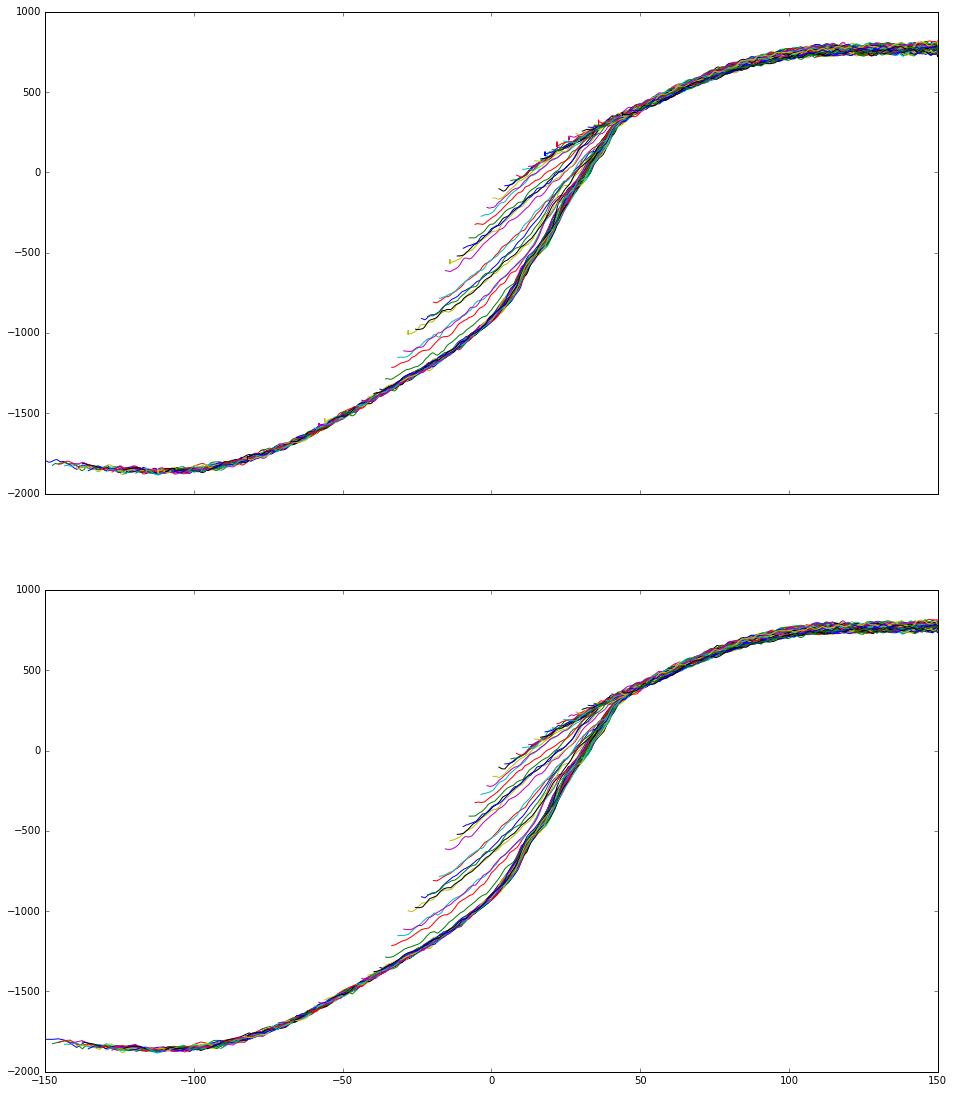

In [11]:
fig, (ax1, ax2) = plt.subplots(2,1,figsize=[16,19], sharex=True)
for HA in sorted(new_df):
    ax1.plot(raw_df[HA]['Ha'], raw_df[HA]['M'])
    ax2.plot(new_df[HA]['Ha'], new_df[HA]['M'])
plt.xlim(-150,150)

In [12]:
dd = []
for HA in sorted(new_df):
    dd.append(new_df[HA])
    dd.append(pd.DataFrame({'Ha': [0], 'Hb': [HA], 'M': 0}))
output_df = pd.concat(dd, ignore_index=True)

In [13]:
output_df

Ha     Hb                    M
0     -149.500000 -0.150            -1797.836
1     -147.476351 -0.150   -1797.794891891892
2     -145.452703 -0.150  -1794.7287567567566
3     -143.429054 -0.150  -1803.0449891891892
4     -141.405405 -0.150  -1823.4816216216213
5     -139.381757 -0.150  -1848.5928432432431
6     -137.358108 -0.150  -1823.5575567567562
7     -135.334459 -0.150    -1844.10032972973
8     -133.310811 -0.150  -1844.7276540540543
9     -131.287162 -0.150  -1844.2337891891889
10    -129.263514 -0.150  -1826.4385729729727
11    -127.239865 -0.150   -1854.881108108108
12    -125.216216 -0.150   -1851.277837837838
13    -123.192568 -0.150  -1847.9550540540542
14    -121.168919 -0.150  -1845.4946378378377
15    -119.145270 -0.150  -1844.5028324324326
16    -117.121622 -0.150  -1854.0031351351352
17    -115.097973 -0.150  -1864.3441351351353
18    -113.074324 -0.150   -1860.768054054054
19    -111.050676 -0.150  -1870.4745675675674
20    -109.027027 -0.150  -1859.2924972972976
21    -107.003378 -0.150   -1850.728616216216
22    -104.979730 -0.150  -1845.4407459459455
23    -102.956081 -0.150  -1860.2315999999996
24    -100.932432 -0.150  -1856.7181189189187
25     -98.908784 -0.150  -1847.6015459459459
26     -96.885135 -0.150  -1834.8346378378376
27     -94.861486 -0.150  -1834.1141936936936
28     -92.837838 -0.150  -1822.6861621621622
29     -90.814189 -0.150  -1813.7109351351348
...           ...    ...                  ...
14970  130.797297  0.048    747.8040648648642
14971  131.483108  0.048     760.264054054054
14972  132.168919  0.048    765.8083783783783
14973  132.854730  0.048    758.2552540540541
14974  133.540541  0.048    747.8927567567567
14975  134.226351  0.048    740.9037513513513
14976  134.912162  0.048    747.7046270270272
14977  135.597973  0.048    762.4154000000002
14978  136.283784  0.048    766.3847999999997
14979  136.969595  0.048    758.1801189189189
14980  137.655405  0.048    754.1802612612612
14981  138.341216  0.048    754.8248270270269
14982  139.027027  0.048     758.386162162162
14983  139.712838  0.048     770.867751351351
14984  140.398649  0.048    780.5293945945945
14985  141.084459  0.048    779.0256648648647
14986  141.770270  0.048    774.6803675675676
14987  142.456081  0.048     768.406708108108
14988  143.141892  0.048     756.779708108108
14989  143.827703  0.048    753.2762702702701
14990  144.513514  0.048    762.8805945945943
14991  145.199324  0.048    768.9406378378377
14992  145.885135  0.048    764.9464216216212
14993  146.570946  0.048    762.2711945945945
14994  147.256757  0.048    764.5932756756756
14995  147.942568  0.048    767.5610486486488
14996  148.628378  0.048    771.3099135135134
14997  149.314189  0.048    769.1991675675674
14998  150.000000  0.048              766.856
14999    0.000000  0.048                    0

[15000 rows x 3 columns]

In [7]:
#output_df = pd.concat(new_df, ignore_index=True)
output_df.to_csv(out_name, sep='\t', index=False)